In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data2015=pd.read_csv('world_happiness_score_dataset.csv')

In [3]:
data2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
data2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
data2015.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
data2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# columns of data

In [7]:
data2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
data2015.shape

(158, 12)

# information about data

In [9]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Missing Values

In [10]:
data2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [11]:
data2015.isnull().sum().sum() 

0

returns a sum of null values within a data frame

Luckily, our data frame does not have any missing values. This dataset is clean and concise, which makes it a great example for beginners.

# Variables

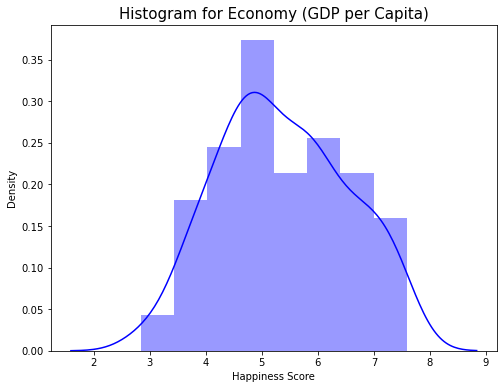

In [12]:
plt.figure(figsize=(8,6))
sns.distplot(data2015['Happiness Score'], kde = True, color ='blue')
plt.title('Histogram for Economy (GDP per Capita)' , fontsize=15);

# create a heatmap of correlations

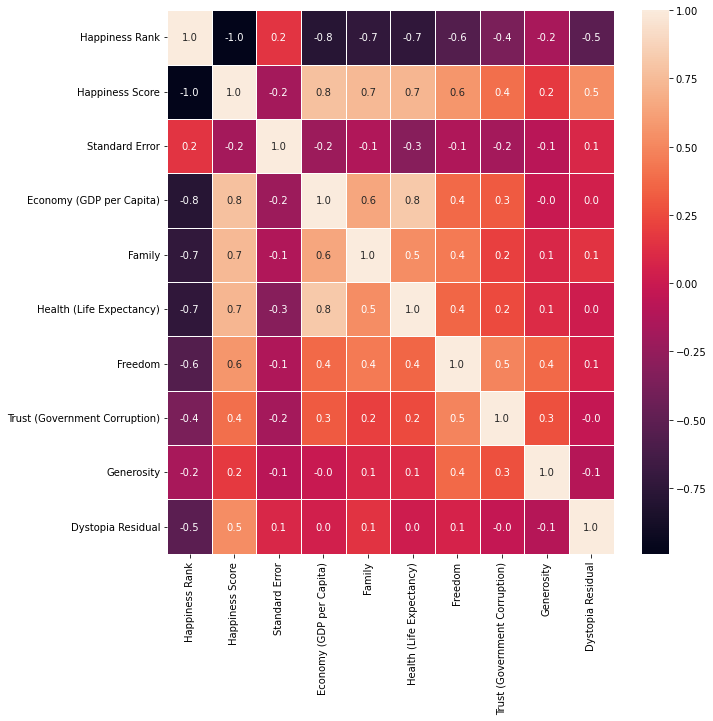

In [13]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data2015.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

according to the correlation map there is a strong positive relationship between Happiness Score, Economy, Family and Health.

In [14]:
!pip install plotly

In [15]:
import plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# subplot

<AxesSubplot:>

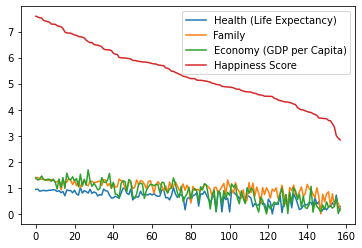

In [16]:
data_plot = data2015.loc[:,["Health (Life Expectancy)","Family", "Economy (GDP per Capita)","Happiness Score" ]]
data_plot.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

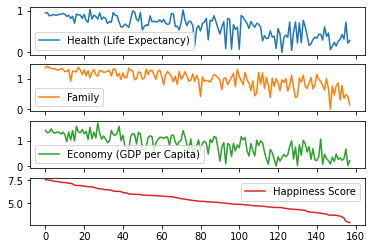

In [17]:
data_plot.plot(subplots = True)

# scatter plot

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

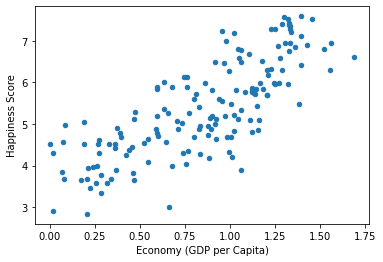

In [18]:
data_plot.plot(kind = "scatter", x = "Economy (GDP per Capita)", y = "Happiness Score")

We can see this positive relationship between happiness score and economy from scatterplot.

In [19]:
data2015.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [20]:
region_list = list(data2015.Region.unique())
region_happiness_score_ratio = []
for i in region_list:
    x = data2015[data2015.Region == i]
    region_happiness_score_rate = sum(x["Happiness Score"])/len(x)
    region_happiness_score_ratio.append(region_happiness_score_rate)
#I want to sort my new data 
data_bar = pd.DataFrame({'region_list':region_list, 'region_happiness_score_ratio':region_happiness_score_ratio})
new_index = (data_bar['region_happiness_score_ratio'].sort_values(ascending = False)).index.values
sorted_data = data_bar.reindex(new_index)


#visualisation

Text(0.5, 1.0, 'Happiness Score Ratio by Regions')

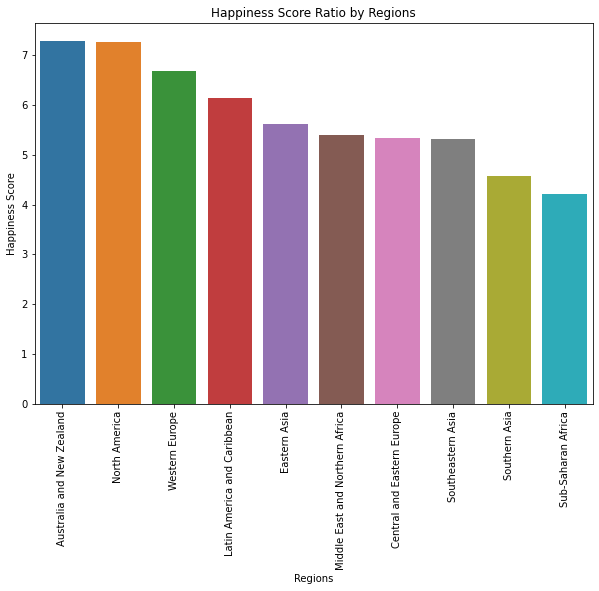

In [21]:
plt.figure(figsize=(10,7))
sns.barplot(x=sorted_data['region_list'], y=sorted_data['region_happiness_score_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Regions')
plt.ylabel('Happiness Score')
plt.title('Happiness Score Ratio by Regions')



Australia and New Zeland region is have highest happiness score ratio. North America and Western Europe are 2. and 3. happiest regions respectively.

Text(0.5, 1.0, 'Economy Ratio by Regions')

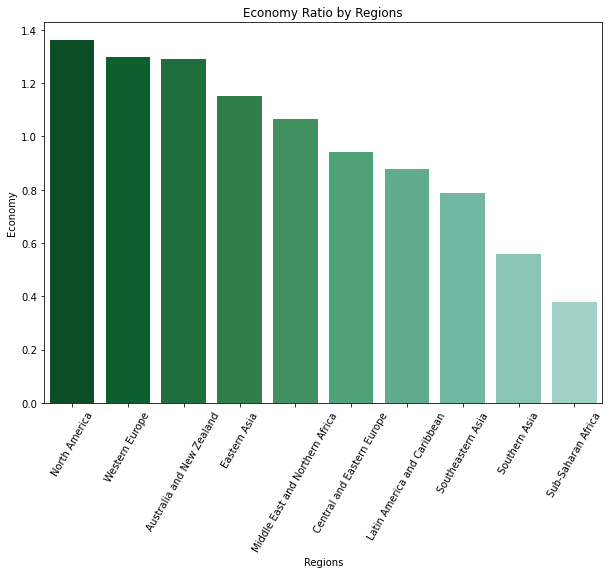

In [22]:
region_economy_ratio = []
for i in region_list:
    y = data2015[data2015.Region == i]
    region_economy_rate = sum(y['Economy (GDP per Capita)'])/len(y)
    region_economy_ratio.append(region_economy_rate)
    
data_bar2 = pd.DataFrame({'region_list':region_list,'region_economy_ratio':region_economy_ratio})
new_index2=(data_bar2['region_economy_ratio'].sort_values(ascending = False)).index.values
sorted_data2 = data_bar2.reindex(new_index2)

plt.figure(figsize=(10,7))
sns.barplot(x=sorted_data2['region_list'], y=sorted_data2['region_economy_ratio'], palette = sns.color_palette("BuGn_r",15) )
plt.xticks(rotation= 60)
plt.xlabel('Regions')
plt.ylabel('Economy')
plt.title('Economy Ratio by Regions')

# visualization on Happines Score vs. Economy Score

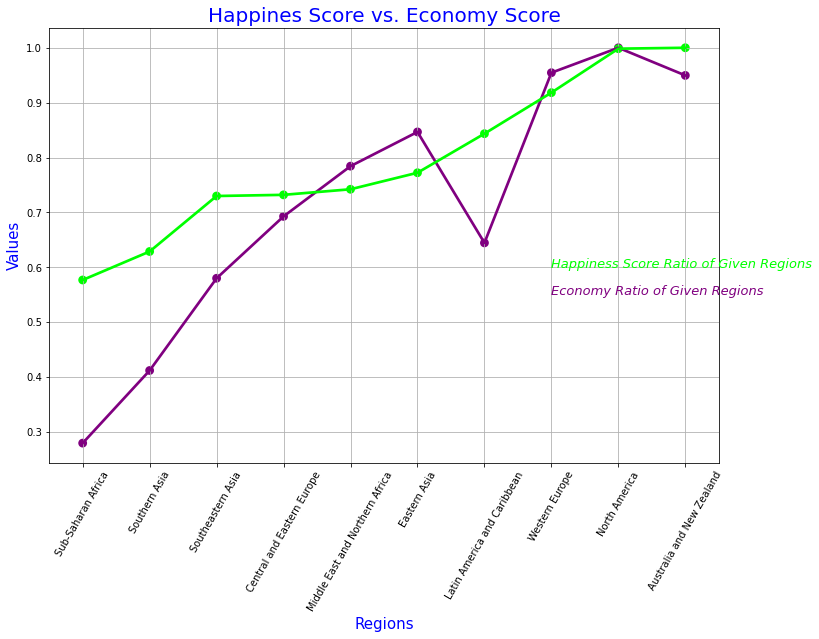

In [23]:
sorted_data.region_happiness_score_ratio = sorted_data.region_happiness_score_ratio/max(sorted_data.region_happiness_score_ratio)
sorted_data2.region_economy_ratio = sorted_data2.region_economy_ratio/max(sorted_data2.region_economy_ratio)
data = pd.concat([sorted_data,sorted_data2.region_economy_ratio],axis = 1)
data.sort_values("region_happiness_score_ratio",inplace = True)

#visualisation
f,ax1 = plt.subplots(figsize = (12,8))
sns.pointplot(x = "region_list",y = "region_economy_ratio",data = data,color = 'purple',alpha = 0.7)
sns.pointplot(x = "region_list",y = "region_happiness_score_ratio", data = data,color = 'lime',alpha = 0.7)
plt.text(7,0.6, "Happiness Score Ratio of Given Regions",color = 'lime',fontsize = 13,style = 'italic' )
plt.text(7,0.55, "Economy Ratio of Given Regions",color = 'purple',fontsize = 13,style = 'italic')
plt.xlabel('Regions', fontsize = 15, color = 'blue')
plt.ylabel('Values', fontsize = 15, color ='blue')
plt.xticks(rotation = 60)
plt.title('Happines Score vs. Economy Score', fontsize = 20, color = 'blue')
plt.grid()


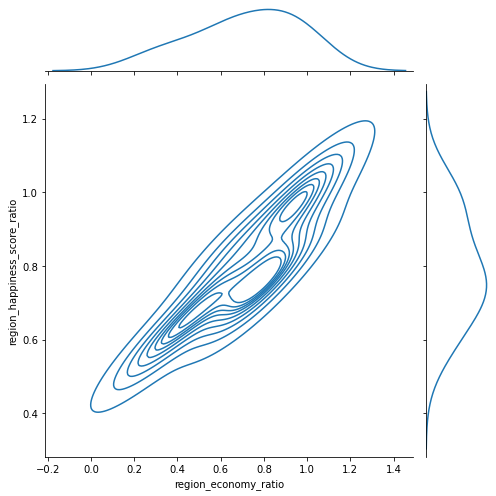

In [24]:
df = sns.jointplot(data.region_economy_ratio, data.region_happiness_score_ratio, kind = "kde", height = 7)
plt.show()

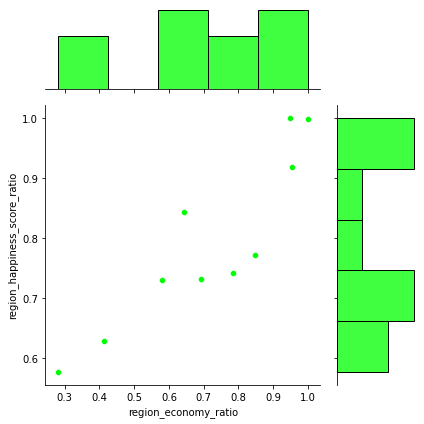

In [25]:
df = (sns.jointplot('region_economy_ratio', 'region_happiness_score_ratio',data = data, color = 'lime', ratio = 3))

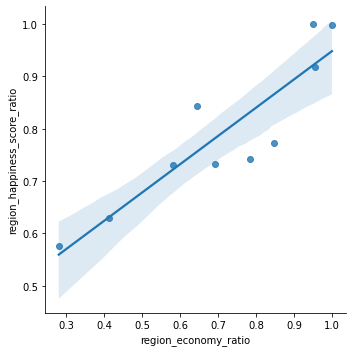

In [26]:
sns.lmplot('region_economy_ratio', 'region_happiness_score_ratio',data = data)
plt.show()

This lmplot shows us the relationship between hapiness score and economy.

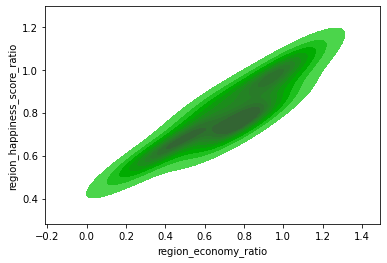

In [27]:
sns.kdeplot(data.region_economy_ratio, data.region_happiness_score_ratio, shade = True, cut = 3, color ='green')
plt.show()

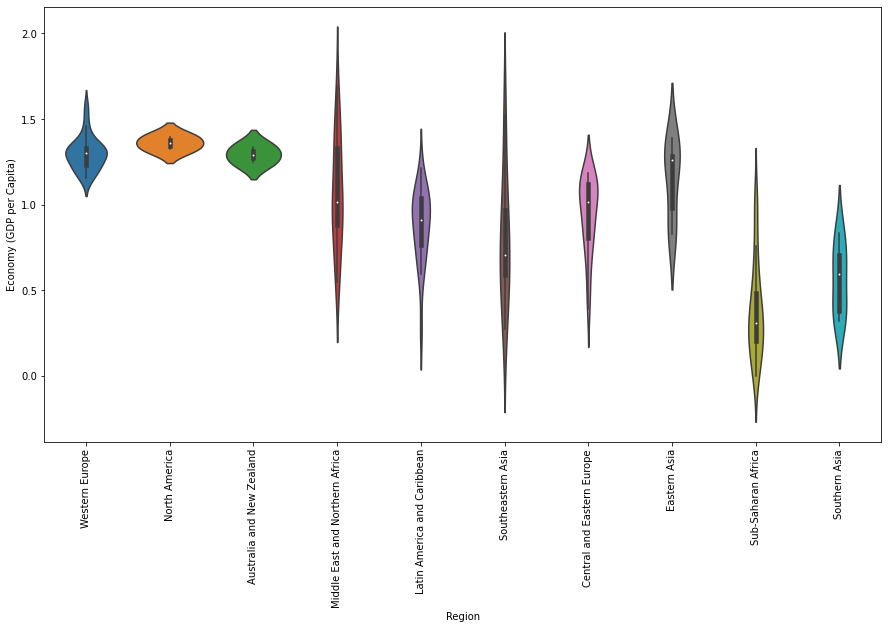

In [28]:
f,ax1 = plt.subplots(figsize = (15,8))
sns.violinplot(x = data2015.Region, y = data2015['Economy (GDP per Capita)'])
plt.xticks(rotation = 90)
plt.show()

# pairplot

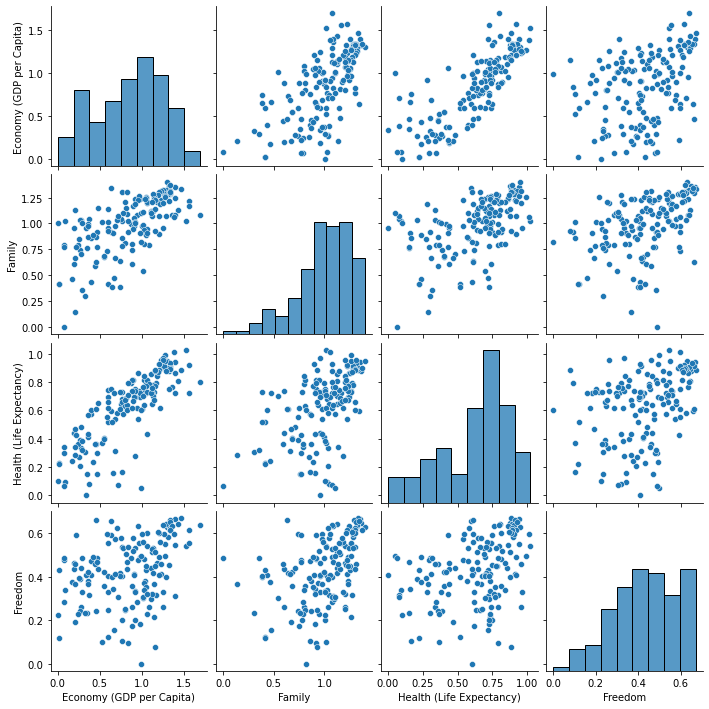

In [29]:
sns.pairplot(data2015.iloc[:,[0,5,6,7,8]])
plt.show()

Here I compound World Happiness Report and World Capitals Gps datas

In [30]:
filter1 = data2015['Happiness Score']>=6.5
happy_countries = data2015[filter1]
happy_countries.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe'], dtype=object)

In [31]:
happy_countries.Region.value_counts()

Western Europe                     14
Latin America and Caribbean         7
Middle East and Northern Africa     4
North America                       2
Australia and New Zealand           2
Southeastern Asia                   1
Central and Eastern Europe          1
Name: Region, dtype: int64

# pie chart

# 'Disstribution of the Happiest Countries by Region'

Text(0.5, 1.0, 'Disstribution of the Happiest Countries by Region')

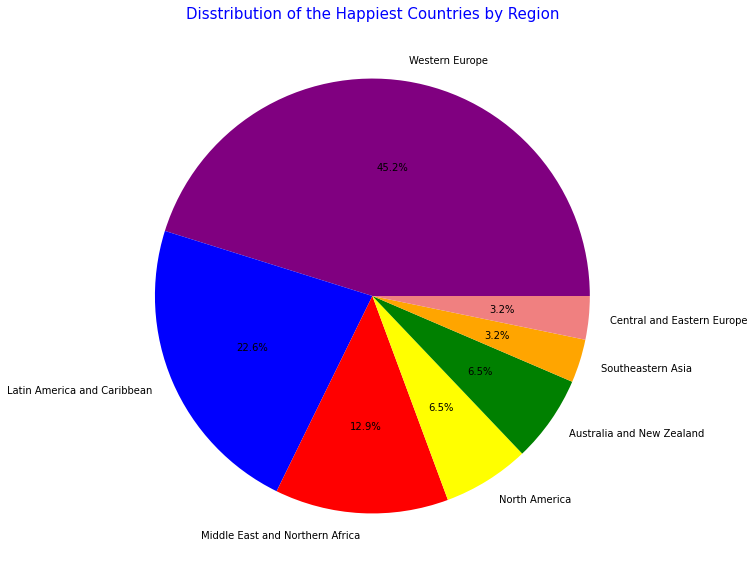

In [32]:
labels = happy_countries.Region.value_counts().index
colors = ['purple','blue','red','yellow','green','orange','lightcoral']
explode = [0,0,0,0,0,0,0]
sizes = happy_countries.Region.value_counts().values

# visual
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Disstribution of the Happiest Countries by Region',color = 'blue',fontsize = 15)

In [33]:
filter2 = data2015['Happiness Score']<4.5
unhappy_countries = data2015[filter2]
unhappy_countries.Region.value_counts()

Sub-Saharan Africa                 25
Central and Eastern Europe          3
Middle East and Northern Africa     3
Southeastern Asia                   2
Southern Asia                       2
Name: Region, dtype: int64

Disstribution of the Least Happy Countries by Region',

Text(0.5, 1.0, 'Disstribution of the Least Happy Countries by Region')

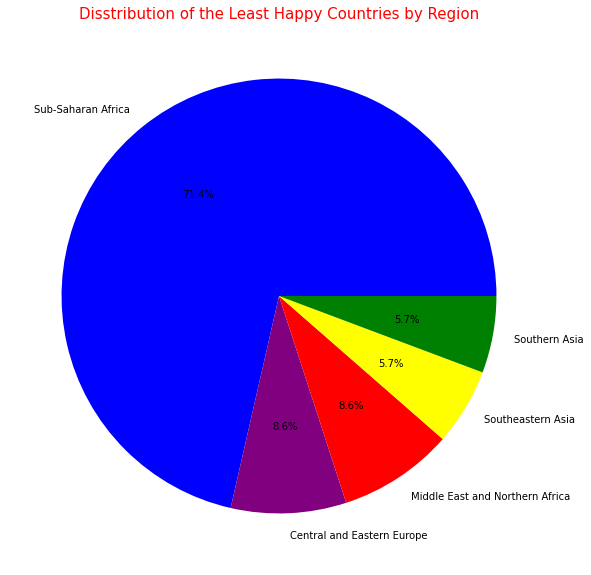

In [34]:
labels = unhappy_countries.Region.value_counts().index
colors = ['blue','purple','red','yellow','green']
explode = [0,0,0,0,0]
sizes = unhappy_countries.Region.value_counts().values

# visual
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Disstribution of the Least Happy Countries by Region',color = 'red',fontsize = 15)

In [35]:
happiness_score = data2015['Happiness Score'].astype(float)

# linear regression

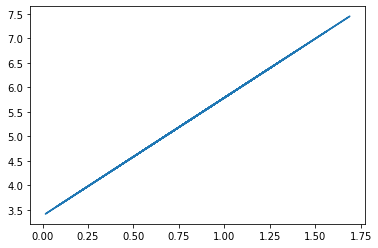

In [36]:
import sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
x = data2015['Economy (GDP per Capita)'].values.reshape(-1,1)
y = data2015['Happiness Score'].values.reshape(-1,1)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state=0)

lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)
plt.plot(x_test,y_pred)

In [37]:
b0 = lin_reg.intercept_
b1 = lin_reg.coef_
print('equation of the line is: ',b1,'x +',b0)

equation of the line is:  [[2.4060534]] x + [3.38107425]


In [38]:
xtest = pd.DataFrame(x_test)
ypred = pd.DataFrame(y_pred)
prediction = pd.concat([xtest,ypred],axis=1)
prediction.columns = ['xtest','ypred']
prediction.sort_values(by='xtest', ascending=False, axis = 0, inplace = True)
prediction.head()

,xtest,ypred
40,1.69042,7.448315
32,1.56391,7.143925
27,1.42727,6.815162
47,1.38604,6.715961
0,1.33171,6.585240


In [39]:
xtest = pd.DataFrame(x_test)
ytest = pd.DataFrame(y_test)
test = pd.concat([xtest,ytest],axis=1)
test.columns = ['xtest','ytest']
test.sort_values(by='xtest', ascending=False, axis = 0, inplace = True)
test.head()

,xtest,ytest
40,1.69042,6.611
32,1.56391,6.946
27,1.42727,6.901
47,1.38604,5.474
0,1.33171,7.364


In [40]:
data2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Multiple linear regression

In [41]:
x1 = data2015[['Economy (GDP per Capita)','Health (Life Expectancy)','Family','Freedom']].values
y1 = data2015['Happiness Score'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = 0.33, random_state=0)
mlp = LinearRegression()
mlp.fit(x1_train,y1_train)
y1_predict = pd.DataFrame(mlp.predict(x1_test))
y1_test = pd.DataFrame(y1_test)

#comparing of test and prediction

In [42]:
comp  = pd.concat([y1_predict,y1_test],axis=1)
comp.columns = ['y1_predict','y1_test']
comp.sort_values(by='y1_test', ascending=False, axis = 0, inplace = True)
comp.sample(10)

,y1_predict,y1_test
41,4.556307,4.677
16,4.506742,4.297
50,2.716061,3.678
8,4.787847,4.686
36,3.942098,4.971
4,5.958899,5.716
40,6.870413,6.611
32,7.036463,6.946
38,5.183602,4.642
34,4.649635,4.194


In [43]:
data2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

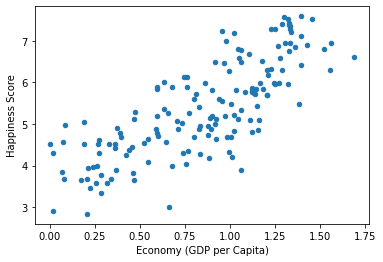

In [44]:
data2015.plot(kind = "scatter", x = "Economy (GDP per Capita)", y = "Happiness Score")

# Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures
pol_reg = PolynomialFeatures(degree = 2)
x_poly = pol_reg.fit_transform(x)
x.shape

(158, 1)